# Linear Regression

**How to train** Linear Regression?

Recall that **training a model** means setting its parameters so that the model best fits the training set. For this purpose, we need to measure how well or poorly the model fits **training data**. To measure it we can use **MSE (Mean Squared Error)** cost function for a linear regression model:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


## Using the Normal Equation to find model parameters
https://cafedev.vn/tu-hoc-ml-phuong-trinh-chuan-trong-hoi-quy-tuyen-tinh/


The Normal Equation is a closed-form solution to find the parameter vector $(\theta)$ that minimizes the Mean Squared Error (MSE) for linear regression. It is particularly useful because it allows you to compute the optimal values of $(\theta)$ directly without iterative optimization methods like gradient descent.

### Normal Equation

The Normal Equation is given by:
$$
 \theta = (X^T X)^{-1} X^T y 
$$
Where:
- $\theta$ is the vector of parameters (coefficients).
- $X$ is the design matrix, containing all the training examples and their features.
- $y$ is the vector of target values.


### Steps to Compute \(\theta\) Using the Normal Equation

1. **Compute $X^T X$**: This is the matrix multiplication of the transpose of $X$ with $X$

2. **Compute $(X^T X)^{-1}$**: This is the inverse of the matrix $X^T X$.

3. **Compute $X^T y$**: This is the matrix multiplication of the transpose of $X$ with the vector $y$.

4. **Compute $\theta$**: Finally, multiply $(X^T X)^{-1}$ with $X^T y$ to get the parameter vector $\theta$.

### Note:

The Normal Equation provides a direct solution but can be computationally expensive for large datasets (with a high number of features), as it involves matrix inversion, which is \(O(n^3)\) in computational complexity. In such cases, iterative methods like gradient descent may be preferred.

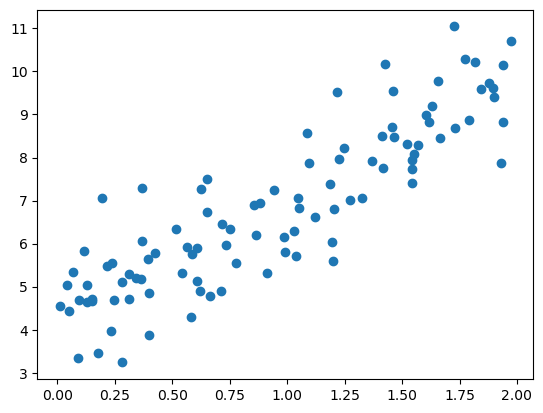

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 2*np.random.rand(m,1)
y = 4+ 3*X + np.random.randn(m,1)
plt.scatter(X,y)
plt.show()

In [11]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T@ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [18]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

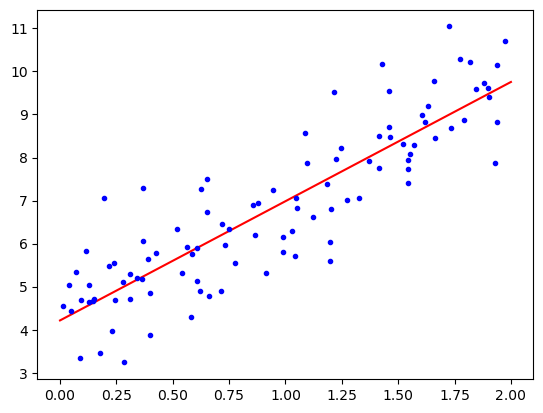

In [15]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
[...]  # beautify the figure: add labels, axis, grid, and legend
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [17]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Batch Gradient Descent là gì?

Batch Gradient Descent là một thuật toán tối ưu hóa sử dụng toàn bộ tập dữ liệu huấn luyện để tính toán gradient của hàm chi phí và cập nhật các tham số của mô hình trong mỗi lần lặp (iteration). Đây là lý do tại sao nó được gọi là "batch" (theo lô), vì nó xử lý toàn bộ lô dữ liệu trong mỗi bước.

### Các Bước của Batch Gradient Descent

1. **Khởi tạo các tham số $\theta$**: Khởi tạo các tham số $\theta$ với các giá trị ngẫu nhiên hoặc bằng 0.
   
2. **Tính toán gradient**: Tính toán gradient của hàm chi phí dựa trên toàn bộ tập dữ liệu.

3. **Cập nhật tham số $\theta$**: Cập nhật các tham số $\theta$ theo hướng giảm của hàm chi phí bằng cách sử dụng công thức gradient descent.

4. **Lặp lại quá trình**: Lặp lại quá trình trên cho đến khi hàm chi phí hội tụ hoặc đạt đến một số lần lặp xác định trước.

### Công Thức Batch Gradient Descent

Giả sử chúng ta có một tập dữ liệu với $m$ mẫu và $n$ đặc trưng. Hàm chi phí MSE cho hồi quy tuyến tính là:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 $$

Đạo hàm riêng của hàm chi phí theo tham số $\theta_j$ là:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} $$

Quy tắc cập nhật tham số $\theta$ trong Batch Gradient Descent là:

$$ \theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} $$

Trong đó:
- $\alpha$ là tốc độ học (learning rate).
  
- $\frac{\partial J(\theta)}{\partial \theta_j}$ là gradient của hàm chi phí theo $\theta_j$.

### Thuật Toán Batch Gradient Descent

1. **Khởi tạo $\theta$**

3. **Lặp lại cho đến khi hội tụ**:


    - Tính dự đoán $ h_{\theta}(x) $ cho toàn bộ tập dữ liệu.
      
    - Tính hàm chi phí $ J(\theta) $.
  
      
    - Tính gradient: $\frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)}$.
  
      
    - Cập nhật $\theta$: $\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)}$.


In [22]:
eta = 0.1 #learning rate
n_epochs = 1000
m = len(X_b)
np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
theta

array([[4.21509616],
       [2.77011339]])

To find **a good learning rate**, you can use grid search (see Chapter 2). However, you may want to limit the number of epochs so that grid search can eliminate models that take too long to converge.

You may wonder **how to set the number of epochs**. If it is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of epochs but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—because this happens when gradient descent has (almost) reached the minimum.

## Stochastic Gradiennt Descent

### What is Stochastic Gradient Descent (SGD)?

Vấn đề chính của batch gradient descent là việc sử dụng toàn bộ tập huấn luyện để tính toán gradients ở mỗi bước, điều này làm cho quá trình rất chậm khi tập huấn luyện lớn. Ngược lại, stochastic gradient descent chọn ngẫu nhiên một ví dụ trong tập huấn luyện ở mỗi bước và tính toán gradients dựa trên chỉ một ví dụ đó. Rõ ràng, làm việc trên một ví dụ duy nhất mỗi lần làm cho thuật toán nhanh hơn nhiều vì nó chỉ có rất ít dữ liệu để xử lý ở mỗi lần lặp. Điều này cũng làm cho nó có thể huấn luyện trên các tập huấn luyện lớn, vì chỉ cần một ví dụ ở trong bộ nhớ ở mỗi lần lặp (SGD có thể được triển khai như một thuật toán out-of-core; xem Chương 1).

Tuy nhiên, do tính ngẫu nhiên của nó, thuật toán này ít đều hơn nhiều so với batch gradient descent: thay vì giảm dần cho đến khi đạt tới giá trị tối thiểu, hàm chi phí sẽ lên xuống, giảm trung bình. Theo thời gian, nó sẽ tiến rất gần tới giá trị tối thiểu, nhưng một khi đạt được đó, nó sẽ tiếp tục lên xuống, không ngừng (xem Hình 4-9). Khi thuật toán dừng lại, các giá trị tham số cuối cùng sẽ tốt, nhưng không phải là tối ưu.

Khi hàm chi phí rất không đều (như trong Hình 4-6), điều này thực sự có thể giúp thuật toán nhảy ra khỏi các điểm cực tiểu cục bộ, do đó stochastic gradient descent có cơ hội tốt hơn để tìm ra giá trị tối thiểu toàn cục so với batch gradient descent.

Do đó, sự ngẫu nhiên là tốt để thoát khỏi các điểm cực tiểu cục bộ, nhưng xấu vì điều đó có nghĩa là thuật toán không bao giờ cố định tại giá trị tối thiểu. Một giải pháp cho khúc mắc này là dần dần giảm tốc độ học. Các bước bắt đầu lớn (giúp tiến triển nhanh và thoát khỏi các điểm cực tiểu cục bộ), sau đó trở nhỏ dần, cho phép thuật toán ổn định tại giá trị tối thiểu toàn cục. Quá trình này tương tự như gia nhiệt mô phỏng, một thuật toán được lấy cảm hứng từ quá trình trong luyện kim loại, nơi kim loại nóng chảy được làm mát dần. Hàm quyết định tốc độ học ở mỗi lần lặp được gọi là lịch trình học. Nếu tốc độ học được giảm quá nhanh, bạn có thể bị kẹt ở một điểm cực tiểu cục bộ, hoặc thậm chí bị đóng băng ở giữa đường tới giá trị tối thiểu. Nếu tốc độ học được giảm quá chậm, bạn có thể nhảy quanh giá trị tối thiểu trong một thời gian dài và kết thúc với một giải pháp không tối ưu nếu bạn dừng huấn luyện quá sớm.



In [23]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [26]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Mini-Batch Gradient Descent

The main advantage of mini-batch GD over stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

| Algorithm        | Large m | Out-of-core support | Large n | Hyperparams | Scaling required | Scikit-Learn   |
|------------------|---------|----------------------|---------|-------------|------------------|----------------|
| Normal equation  | Fast    | No                   | Slow    | 0           | No               | N/A            |
| SVD              | Fast    | No                   | Slow    | 0           | No               | LinearRegression |
| Batch GD         | Slow    | No                   | Fast    | 2           | Yes              | N/A            |
| Stochastic GD    | Fast    | Yes                  | Fast    | ≥2          | Yes              | SGDRegressor   |
| Mini-batch GD    | Fast    | Yes                  | Fast    | ≥2          | Yes              | N/A            |


# Polynomial Regression
What if data is more complex than a straight line? We can use a linear model to fit a nonlinear data

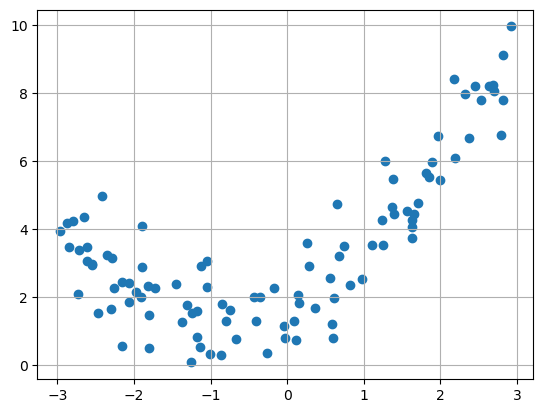

In [30]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X,y)
plt.grid()
plt.show()

In [33]:
from sklearn.preprocessing import PolynomialFeatures 

poly_feature = PolynomialFeatures(degree = 2, include_bias= False)
X_poly = poly_feature.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))